In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/zoeyyzh/springboard/main/world%20happiness%20report%202019.csv',index_col='Country or region')
df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


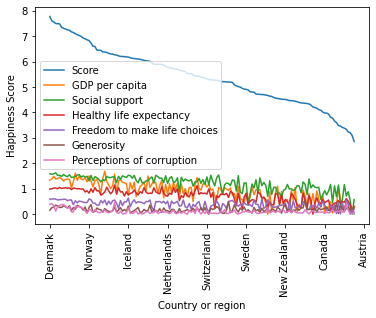

In [8]:
import matplotlib.pyplot as plt
plot_line = df[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].plot()
plot_line.set_ylabel('Happiness Score')
plot_line.set_xticklabels(df.index, rotation=90)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

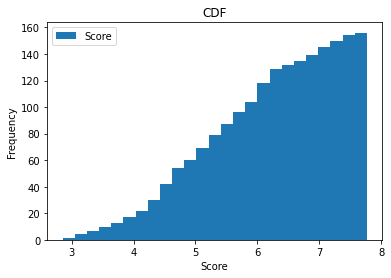

In [22]:
df.plot(y='Score',kind='hist',bins=25,cumulative=True)
plt.xlabel('Score')
plt.title('CDF')
plt.show

In [23]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
# GDP per capita: median is larger than mean: there are more poor people than rich people.

# social support: data is scattered around high scores: social support tends to go towards saturation. When there is
# no social support at all, people feel very unhappy. But too much social support did not help to bring up the happiness
# score too much.


<function matplotlib.pyplot.show(*args, **kw)>

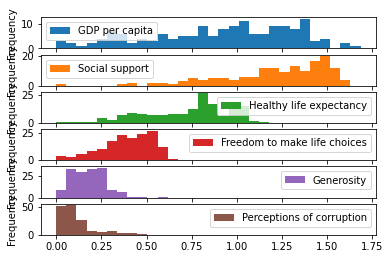

In [17]:
df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].plot(kind='hist',bins=30, subplots=True)
plt.show

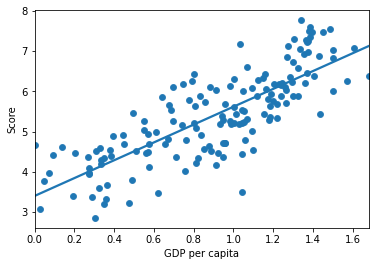

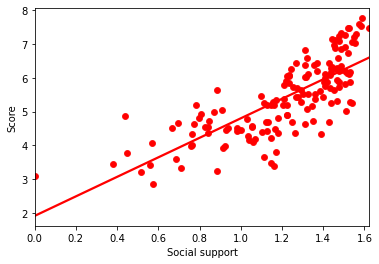

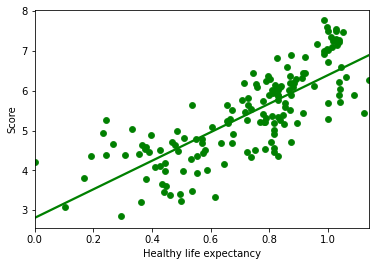

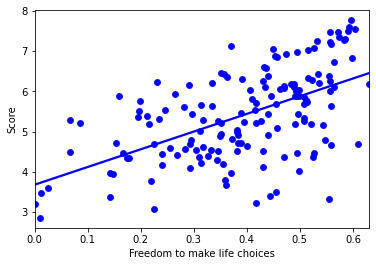

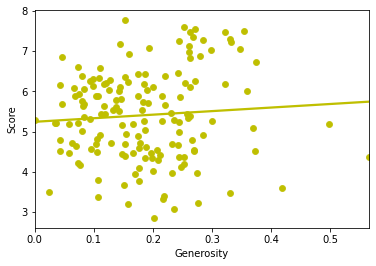

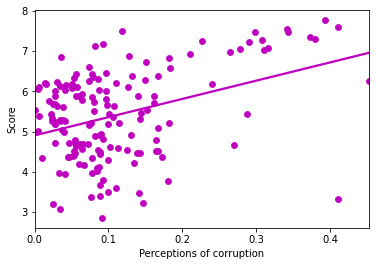

In [14]:
import seaborn as sns
df.plot(x='GDP per capita',y='Score',kind='scatter')
sns.regplot(df['GDP per capita'], df['Score'], ci=None)
df.plot(x='Social support',y='Score',kind='scatter',color='r')
sns.regplot(df['Social support'], df['Score'], ci=None, color='r')
df.plot(x='Healthy life expectancy',y='Score',kind='scatter',color='g')
sns.regplot(df['Healthy life expectancy'], df['Score'], ci=None, color='g')
df.plot(x='Freedom to make life choices',y='Score',kind='scatter',color='b')
sns.regplot(df['Freedom to make life choices'], df['Score'], ci=None, color='b')
df.plot(x='Generosity',y='Score',kind='scatter',color='y')
sns.regplot(df['Generosity'], df['Score'], ci=None, color='y')
df.plot(x='Perceptions of corruption',y='Score',kind='scatter',color='m')
sns.regplot(df['Perceptions of corruption'], df['Score'], ci=None, color='m')
plt.show()

In [ ]:
# There is a strong linear correlation between score and GDP per capita, social support and healthy life expectancy.
# The correlation between score and freedom to make life choices, generosity, and perceptions of corruption is not as strong.
# perception of corruption: higher score correlates to higher perception of corruption. 
# maybe relates to higher education.


In [79]:
# scaling
from sklearn import preprocessing
a = df[['Overall rank','Score']]
b = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
c = df.index
normalized_b = preprocessing.normalize(b)
df_1 = pd.DataFrame(data = a, columns = ['Overall rank','Score'])
df_2 = pd.DataFrame(data = normalized_b, columns = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
df_3 = pd.DataFrame(data = c, columns = ['Country or region'])
df_new = pd.concat([df_3.reset_index(drop=True), df_1.reset_index(drop=True), df_2.reset_index(drop=True)], axis=1, ignore_index=True)
df_new.rename(columns={0: 'Country or region', 1: 'Overall rank', 2: 'Score', 3: 'GDP per capita', 4: 'Social support', 5: 'Healthy life expectancy', 6: 'Freedom to make life choices', 7: 'Generosity', 8: 'Perceptions of corruption'}, inplace=True)
df_new.set_index('Country or region', inplace=True)
df_new.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,0.555475,0.657864,0.408730,0.247062,0.063424,0.162912
Denmark,2,7.600,0.566447,0.644266,0.407940,0.242470,0.103214,0.167927
Norway,3,7.554,0.591568,0.628938,0.408691,0.239728,0.107739,0.135568
Iceland,4,7.494,0.559527,0.658458,0.415996,0.239624,0.143531,0.047844
Netherlands,5,7.488,0.581362,0.633835,0.416032,0.231962,0.134096,0.124102


In [ ]:
# why do overall rank and score columns become NaN after concatenation using pd.concat([df_3, df_1, df_2], axis=1)?
# Normalize function normalized all data to the same range

In [64]:
#scaling #2
from sklearn import preprocessing
a = df[['Score']]
b = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
min_max_scaler = preprocessing.MinMaxScaler()
b_scaled = min_max_scaler.fit_transform(b)
df1 = pd.DataFrame(data = a, columns = ['Overall rank','Score'])
df2 = pd.DataFrame(data = b_scaled, columns = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])
df3 = pd.DataFrame(data = c, columns = ['Country or region'])
df_new2 = pd.concat([df3.reset_index(drop=True), df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1, ignore_index=True)
df_new2.rename(columns={0: 'Country or region', 1: 'Overall rank', 2: 'Score', 3: 'GDP per capita', 4: 'Social support', 5: 'Healthy life expectancy', 6: 'Freedom to make life choices', 7: 'Generosity', 8: 'Perceptions of corruption'}, inplace=True)
df_new2.set_index('Country or region', inplace=True)
df_new2.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,NaN,7.769,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550
Denmark,NaN,7.600,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077
Norway,NaN,7.554,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759
Iceland,NaN,7.494,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486
Netherlands,NaN,7.488,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837


In [ ]:
# why does overall rank become NaN?....
# MinMaxScaler() normalized each column by its range

In [ ]:
####################### ScikitLearn Linear Regression##################################

In [72]:
X = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].values
y = df['Score'].values


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.5831750841034311

In [ ]:
# original data without normalization: R2 is 0.58

In [76]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1,  normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.5901952011975442

In [91]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

-0.0031787487830448047

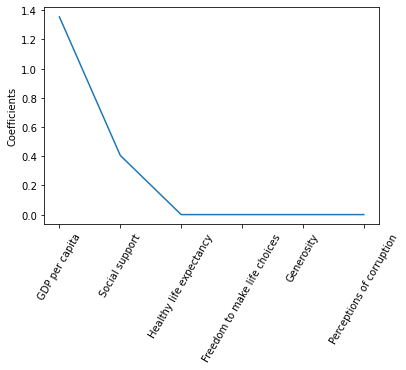

In [92]:
names = df[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [86]:
Xn = df_new[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].values
yn = df_new['Score'].values

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.3, random_state = 42)
regn_all = LinearRegression()
regn_all.fit(Xn_train, yn_train)
yn_pred = regn_all.predict(Xn_test)
regn_all.score(Xn_test, yn_test)

0.0733083868894564

In [ ]:
# R2 is very small if using normalized data...

In [88]:
from sklearn.linear_model import Ridge
ridgen = Ridge(alpha=0.1, normalize=True)
ridgen.fit(Xn_train, yn_train)
ridgen_pred = ridgen.predict(Xn_test)
ridgen.score(Xn_test, yn_test)

0.12752033871569057